In [1]:
import nilearn.datasets
import nilearn.image
import nilearn.plotting
import nilearn.surface

import numpy as np
import matplotlib.pyplot as plt

/Users/eyshin/.pyenv/versions/eyspy3.6/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/Users/eyshin/.pyenv/versions/eyspy3.6/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/eyshin/.pyenv/versions/eyspy3.6/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: Fut

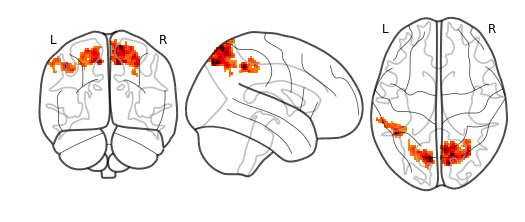

In [2]:
stat_map = nilearn.image.load_img('stat_map.nii.gz')
nilearn.plotting.plot_glass_brain(stat_map)

In [3]:
big_fsaverage = nilearn.datasets.fetch_surf_fsaverage('fsaverage')

In [4]:
# sulc background data processing - to emphasize sulcus, add binarized data

bg_data = nilearn.surface.load_surf_data(big_fsaverage.sulc_right)
bg_data_bin = np.zeros(bg_data.shape)
bg_data_bin[bg_data > 0] = 1
bg_data_bin += bg_data

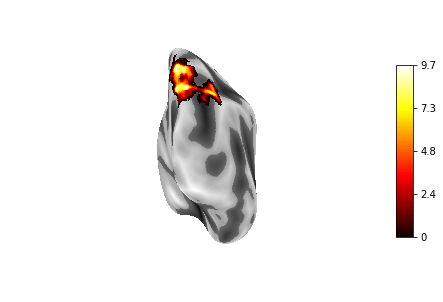

In [5]:
texture = nilearn.surface.vol_to_surf(stat_map, big_fsaverage.pial_right)

fig = nilearn.plotting.plot_surf_stat_map(
    surf_mesh=big_fsaverage['infl_right'],
    stat_map=texture,
    hemi='right',
    view='posterior',
    bg_map=bg_data_bin
)

# if you want to save this figure as a highres png file...
#fig.savefig('stat_map_right_posterior.png', dpi=300)

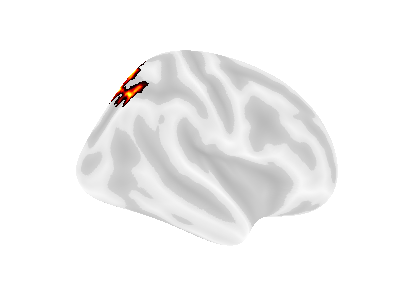

In [6]:
# make bg_map brighter (use plot_surf instead of plot_surf_stat_map)

fig = nilearn.plotting.plot_surf(
    surf_mesh=big_fsaverage['infl_right'],
    surf_map=texture,
    cmap='hot',
    hemi='right',
    view='lateral',
    bg_map=bg_data_bin,
    darkness=0.3
)